In [2]:
from keras.datasets import mnist
(Xtrain,Ytrain),(Xtest,Ytest)=mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


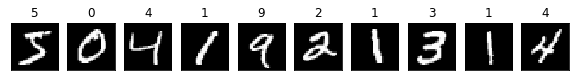

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm 
import numpy as np

#plot first six training images
fig=plt.figure(figsize=(10,10))
for i in range(10):
  ax=fig.add_subplot(1,10,i+1, xticks=[],yticks=[])
  ax.imshow(Xtrain[i],cmap='gray')
  ax.set_title(str(Ytrain[i]))

In [0]:
# rescale [0,255]-->[0,1]
Xtrain = Xtrain.astype('float32')/255
Xtest =Xtest.astype('float32')/255

In [0]:
from keras.utils import np_utils

#print first ten (integer valued) training label

print('Integer-valued labels:')
print(Ytrain[:10])

#one hot encoding
Ytrain=np_utils.to_categorical(Ytrain,10)
Ytest=np_utils.to_categorical(Ytest,10)

#print first 10 (one-hot) training labels
print('One-hot labels:')
print(Ytrain[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#define the model
model =Sequential()
model.add(Flatten(input_shape=Xtrain.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [0]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
#evaluate test accuracy
 score=model.evaluate(Xtest,Ytest,verbose=0)
 accuracy=100*score[1]

 #print test accuracy before training
 print('Test accuracy:',accuracy)

Test accuracy: 98.34


In [0]:
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer= ModelCheckpoint(filepath='mnist.model.best.hdf5',verbose=1,save_best_only=True)
hist= model.fit(Xtrain,Ytrain,batch_size=128,epochs=5,validation_split=0.2,callbacks=[checkpointer], verbose=1,shuffle=True)

In [0]:
#load the weights
model.load_weights('mnist.model.best.hdf5')

In [0]:
#evaluate test accuracy
 score=model.evaluate(Xtest,Ytest,verbose=0)
 accuracy=100*score[1]

 #print test accuracy after training
 print('Test accuracy:',accuracy)

Test accuracy: 98.14
